In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [40]:
true_data = pd.read_csv('./../../processed_VideoCommentsThreatCorpus.csv')

pred_data_mistral = pd.read_csv('no_context_mistral_final.csv')
pred_data_mistral_nemo = pd.read_csv('no_context_mistral-nemo_final.csv')
pred_data_mistral_small = pd.read_csv('no_context_mistral-small_final.csv')
pred_data_qwen_8 = pd.read_csv('no_context_qwen3-8-final.csv')
pred_data_qwen_14 = pd.read_csv('no_context_qwen14b-final.csv')
pred_data_gemma = pd.read_csv('no_context_gemma312b-final.csv')


In [41]:
def batch_eval(true_df: pd.DataFrame, pred_df: pd.DataFrame):
    # Map predicted labels: 0/1 → 0, 2 → 1, else → -1 (failed classification)
    pred_df['violence_label'] = pred_df['violence_label'].apply(lambda x: 0 if x in [0, 1] else 1 if x == 2 else -1)

    # Merge datasets
    merged_df = true_df.merge(pred_df, left_on='id', right_on='document_id', suffixes=('_true', '_pred'))

    # Convert flags to int
    merged_df['flags'] = merged_df['flags'].astype(str).str.extract(r'(\d+)').astype(int)

    # Count failures and successes
    total_predictions = len(merged_df)
    failed_predictions = (merged_df['violence_label'] == -1).sum()
    successful_predictions = total_predictions - failed_predictions

    print(f'Total predictions: {total_predictions}')
    print(f'Failed classifications: {failed_predictions} ({failed_predictions / total_predictions:.2%})')
    print(f'Successful classifications: {successful_predictions} ({successful_predictions / total_predictions:.2%})\n')

    # Filter out failed classifications (-1) before evaluation
    merged_df = merged_df[merged_df['violence_label'] != -1]

    # Extract labels
    y_true = merged_df['flags']
    y_pred = merged_df['violence_label']

    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    report = classification_report(y_true, y_pred, labels=[0, 1])

    # Print results
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('\nConfusion Matrix:\n', cm)
    print('\nClassification Report:\n', report)

    # Visualization of Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Violent', 'Violent'], yticklabels=['Non-Violent', 'Violent'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix [Neighbors]')
    plt.show()

    # Plot distribution of true and predicted labels
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.countplot(x=y_true, ax=ax[0])
    ax[0].set_title('True Label Distribution')
    ax[0].set_xticklabels(['Non-Violent', 'Violent'])

    sns.countplot(x=y_pred, ax=ax[1])
    ax[1].set_title('Predicted Label Distribution')
    ax[1].set_xticklabels(['Non-Violent', 'Violent'])

    plt.show()

Mistral
Total predictions: 9630
Failed classifications: 0 (0.00%)
Successful classifications: 9630 (100.00%)

Accuracy: 0.8707
Precision: 0.8891
Recall: 0.8707
F1 Score: 0.8780

Confusion Matrix:
 [[7547  823]
 [ 422  838]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      8370
           1       0.50      0.67      0.57      1260

    accuracy                           0.87      9630
   macro avg       0.73      0.78      0.75      9630
weighted avg       0.89      0.87      0.88      9630



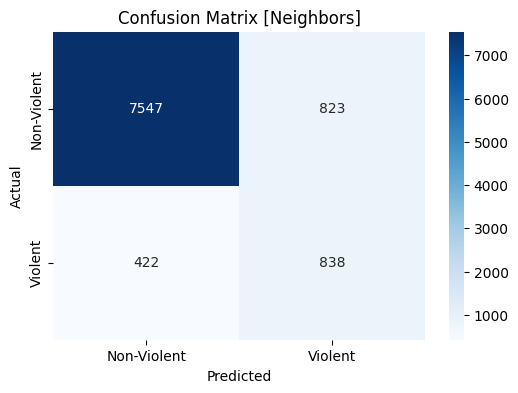

/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_20743/3188133180.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_20743/3188133180.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


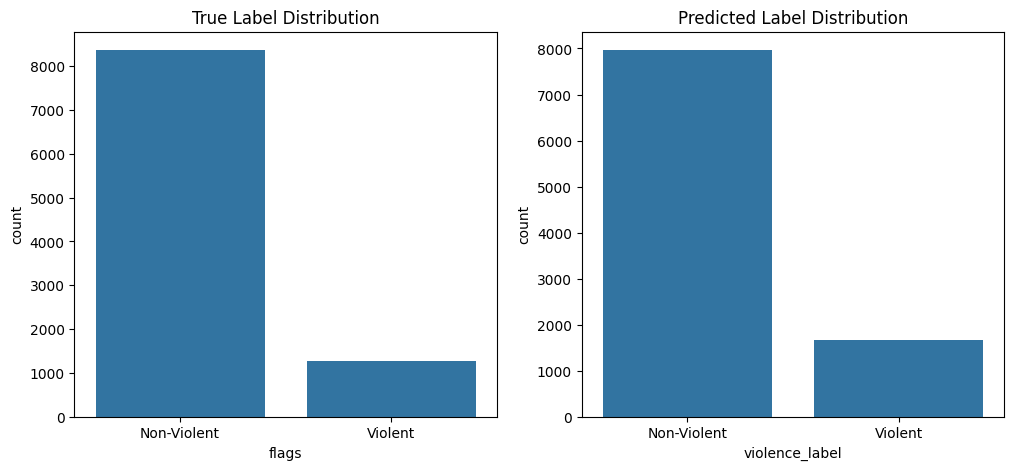

Mistral-Nemo
Total predictions: 9630
Failed classifications: 0 (0.00%)
Successful classifications: 9630 (100.00%)

Accuracy: 0.8515
Precision: 0.9074
Recall: 0.8515
F1 Score: 0.8684

Confusion Matrix:
 [[7128 1242]
 [ 188 1072]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      8370
           1       0.46      0.85      0.60      1260

    accuracy                           0.85      9630
   macro avg       0.72      0.85      0.75      9630
weighted avg       0.91      0.85      0.87      9630



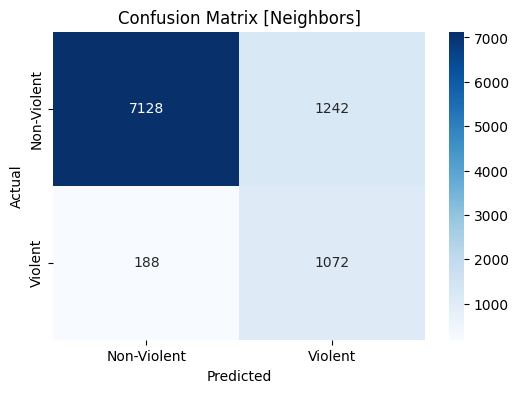

/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_20743/3188133180.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_20743/3188133180.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


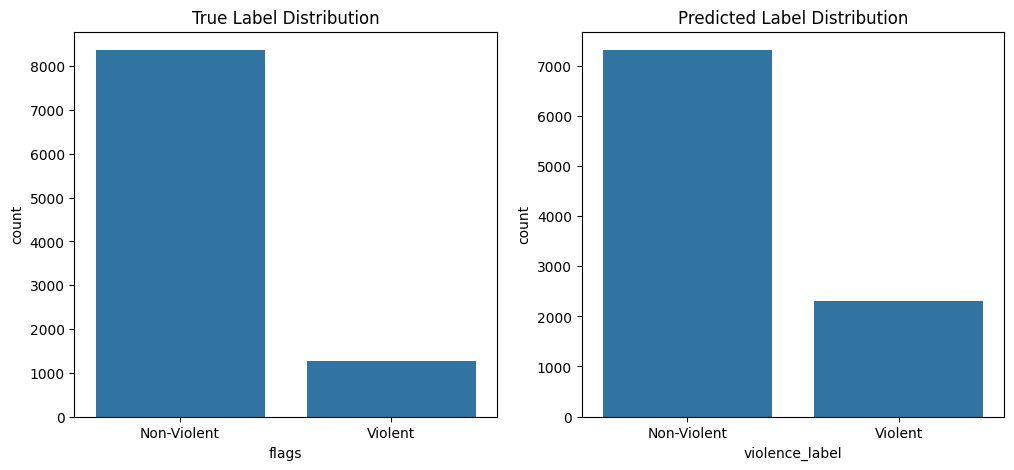

Mistral-Small
Total predictions: 9630
Failed classifications: 0 (0.00%)
Successful classifications: 9630 (100.00%)

Accuracy: 0.9117
Precision: 0.9080
Recall: 0.9117
F1 Score: 0.9095

Confusion Matrix:
 [[8015  355]
 [ 495  765]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      8370
           1       0.68      0.61      0.64      1260

    accuracy                           0.91      9630
   macro avg       0.81      0.78      0.80      9630
weighted avg       0.91      0.91      0.91      9630



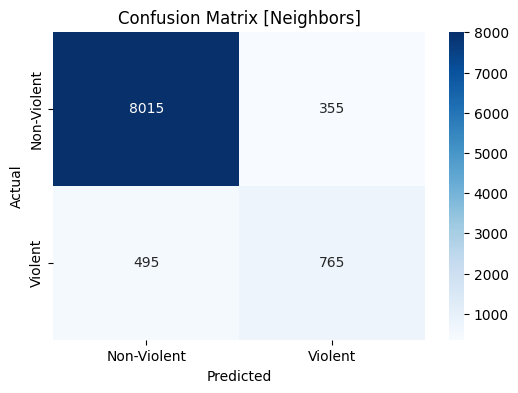

/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_20743/3188133180.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_20743/3188133180.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


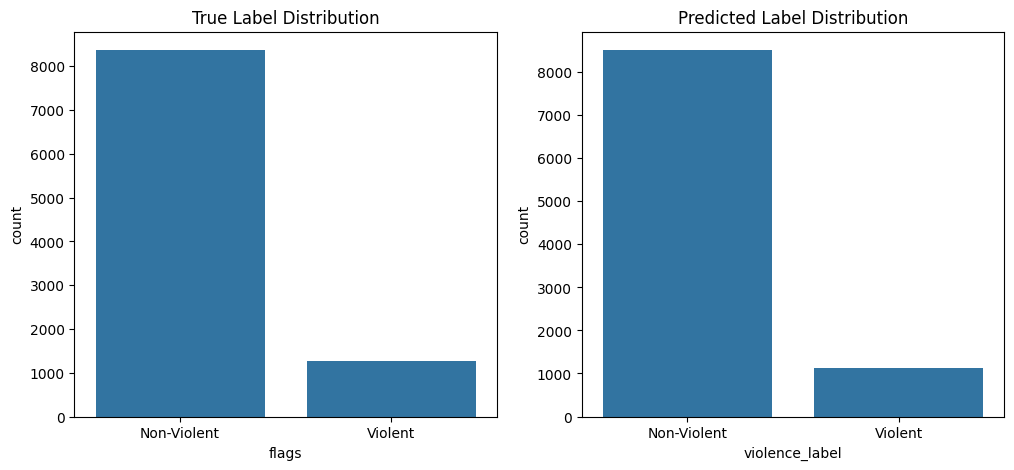

Qwen-8
Total predictions: 9630
Failed classifications: 0 (0.00%)
Successful classifications: 9630 (100.00%)

Accuracy: 0.9005
Precision: 0.9056
Recall: 0.9005
F1 Score: 0.9028

Confusion Matrix:
 [[7819  551]
 [ 407  853]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      8370
           1       0.61      0.68      0.64      1260

    accuracy                           0.90      9630
   macro avg       0.78      0.81      0.79      9630
weighted avg       0.91      0.90      0.90      9630



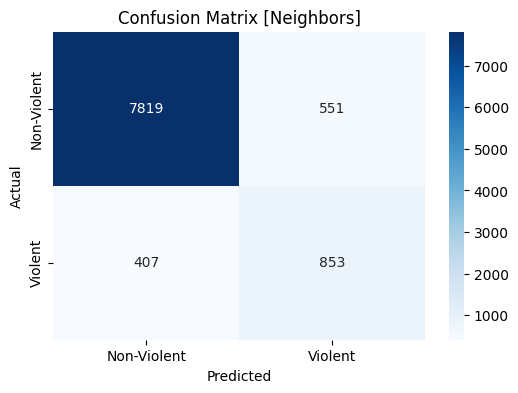

/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_20743/3188133180.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_20743/3188133180.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


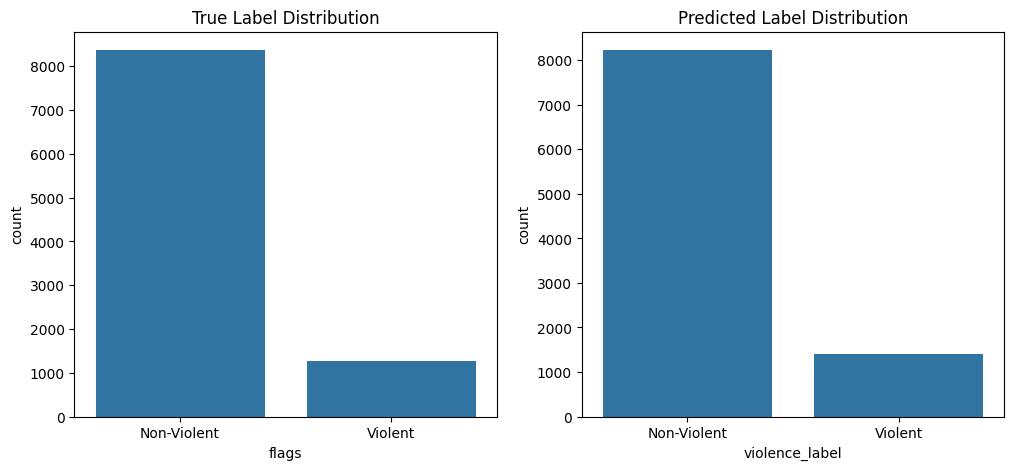

Qwen-14
Total predictions: 9630
Failed classifications: 0 (0.00%)
Successful classifications: 9630 (100.00%)

Accuracy: 0.8783
Precision: 0.9138
Recall: 0.8783
F1 Score: 0.8895

Confusion Matrix:
 [[7405  965]
 [ 207 1053]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.93      8370
           1       0.52      0.84      0.64      1260

    accuracy                           0.88      9630
   macro avg       0.75      0.86      0.78      9630
weighted avg       0.91      0.88      0.89      9630



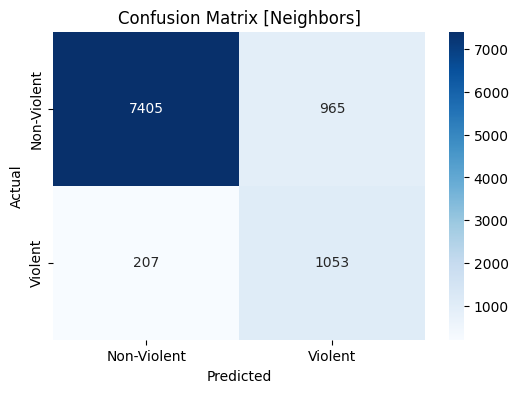

/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_20743/3188133180.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_20743/3188133180.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


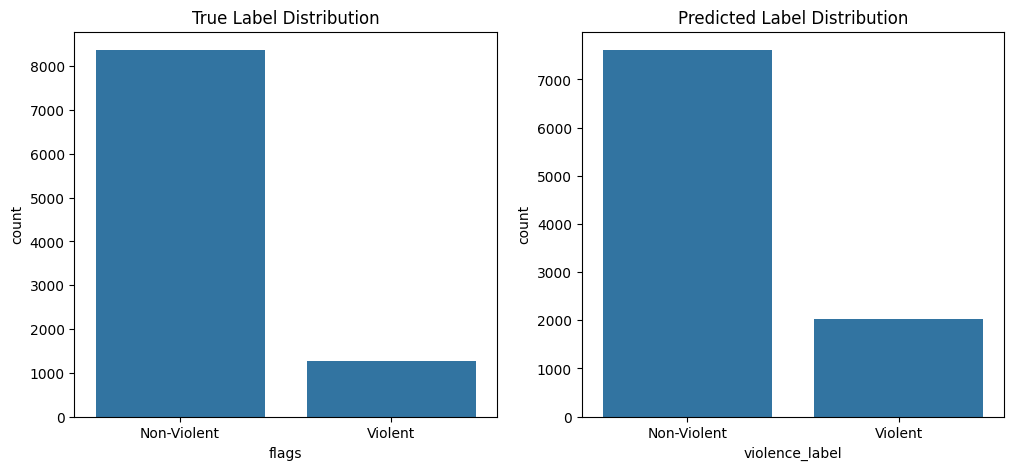

Gemma
Total predictions: 9630
Failed classifications: 4 (0.04%)
Successful classifications: 9626 (99.96%)

Accuracy: 0.8469
Precision: 0.9012
Recall: 0.8469
F1 Score: 0.8639

Confusion Matrix:
 [[7122 1244]
 [ 230 1030]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      8366
           1       0.45      0.82      0.58      1260

    accuracy                           0.85      9626
   macro avg       0.71      0.83      0.74      9626
weighted avg       0.90      0.85      0.86      9626



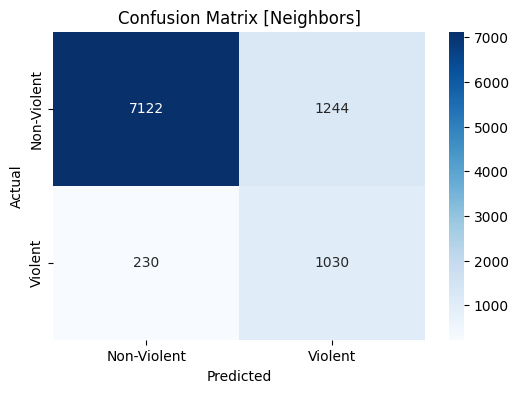

/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_20743/3188133180.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_20743/3188133180.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


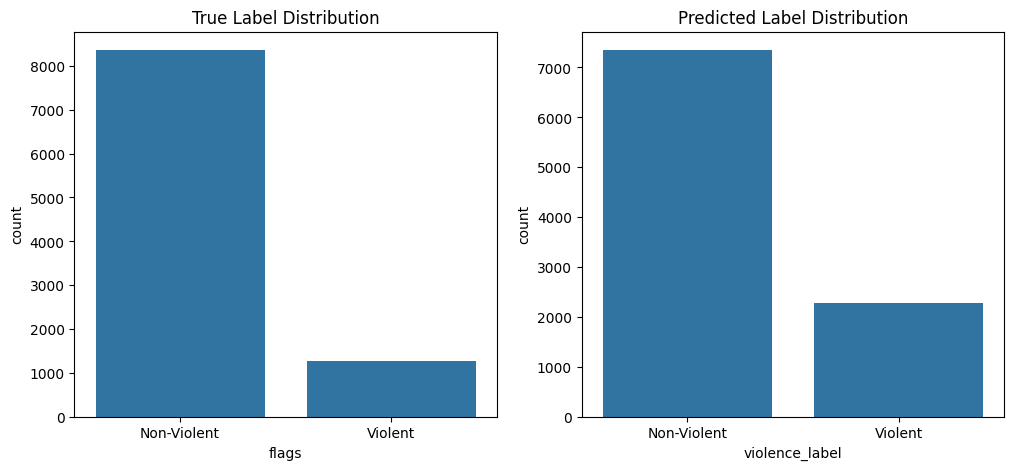

In [42]:
print("Mistral")
batch_eval(true_data, pred_data_mistral)
print("Mistral-Nemo")
batch_eval(true_data, pred_data_mistral_nemo)
print("Mistral-Small")
batch_eval(true_data, pred_data_mistral_small)
print("Qwen-8")
batch_eval(true_data, pred_data_qwen_8)
print("Qwen-14")
batch_eval(true_data, pred_data_qwen_14)
print("Gemma")
batch_eval(true_data, pred_data_gemma)

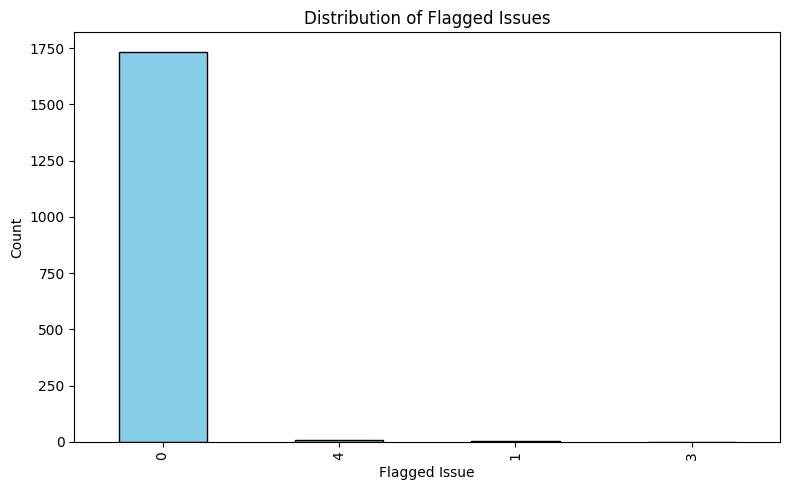

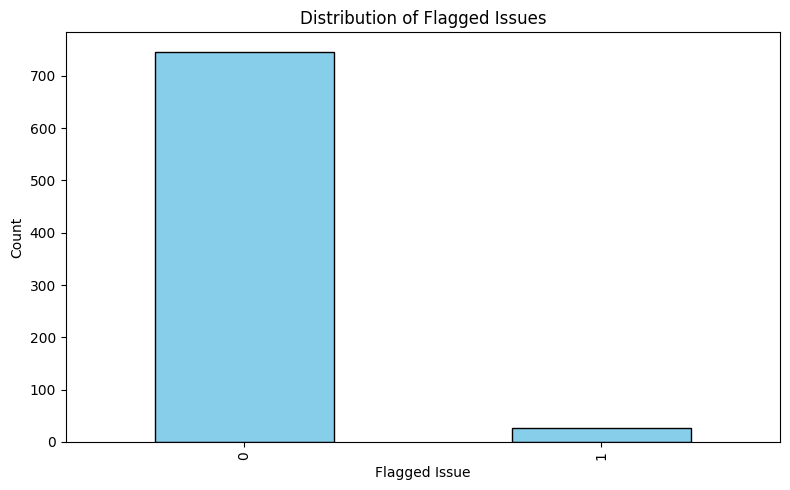

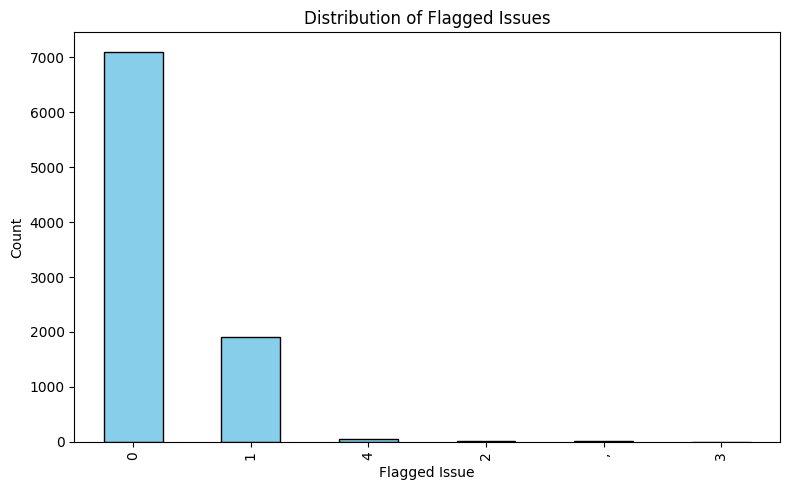

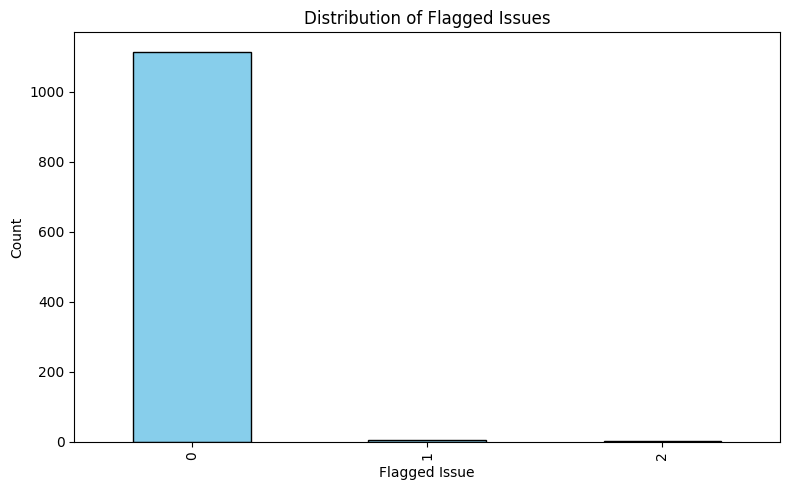

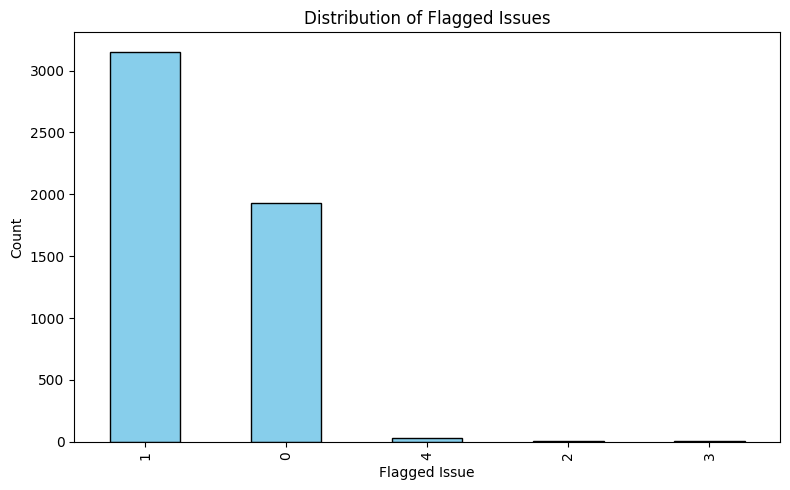

TypeError: 'float' object is not iterable

In [49]:
pred_data_div = [pred_data_mistral, pred_data_mistral_nemo, pred_data_mistral_small, pred_data_qwen_8, pred_data_qwen_14, pred_data_gemma]

for pred_data in pred_data_div:
    
    # Ensure flagged_issues is interpreted as lists
    # pred_data["flagged_issues"] = pred_data["flagged_issues"].apply(eval)

    # Flatten the flagged issues into a single list
    all_flags = [item for sublist in pred_data["flagged_issues"] for item in sublist]

    all_flags = [item.strip("[]'\" ") for item in all_flags if item.strip("[]'\" ") not in ["", "[", "]"]]

    # Count occurrences of each flag
    flag_counts = pd.Series(all_flags).value_counts()
  
    if not flag_counts.empty:
        plt.figure(figsize=(8, 5))
        flag_counts.plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title("Distribution of Flagged Issues")
        plt.xlabel("Flagged Issue")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
    else:
        print("No flagged issues to plot.")

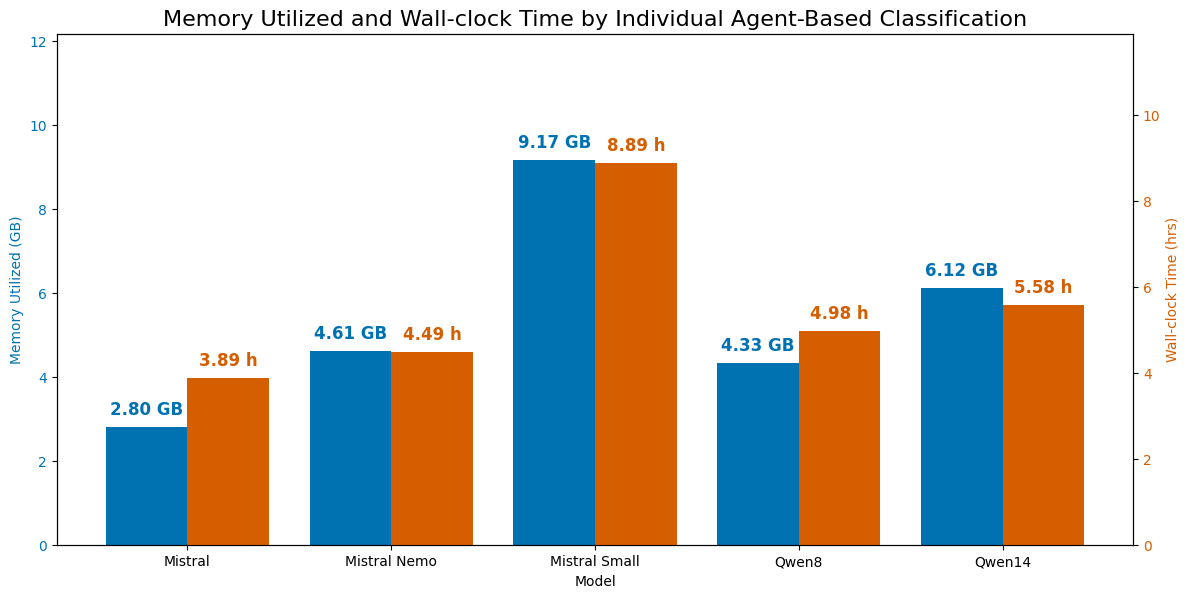

In [44]:
# Updated version with larger labels and colorblind-friendly palette

import matplotlib.pyplot as plt
import pandas as pd

# Define the data
models = ["Mistral", "Mistral Nemo", "Mistral Small", "Qwen8", "Qwen14"]
memory_utilized_gb = [2.80, 4.61, 9.17, 4.33, 6.12]
wall_clock_hours = [3 + 53/60 + 21/3600,
                    4 + 29/60 + 27/3600,
                    8 + 53/60 + 14/3600,
                    4 + 58/60 + 55/3600,
                    5 + 35/60 + 1/3600]

df = pd.DataFrame({
    "Model": models,
    "Memory Utilized (GB)": memory_utilized_gb,
    "Wall-clock Time (hrs)": wall_clock_hours
})

# Plot setup
bar_width = 0.4
index = range(len(df))
fig, ax1 = plt.subplots(figsize=(12, 7))

positions_memory = [i - bar_width/2 for i in index]
positions_time = [i + bar_width/2 for i in index]

# Memory bars (Color Universal Design: blue)
bars_memory = ax1.bar(positions_memory, df["Memory Utilized (GB)"],
                      width=bar_width, color='#0072B2', label='Memory Utilized (GB)')
ax1.set_ylabel("Memory Utilized (GB)", color='#0072B2')
ax1.tick_params(axis='y', labelcolor='#0072B2')

# Memory labels ABOVE bars
for rect in bars_memory:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2, height + 0.2,
             f'{height:.2f} GB', ha='center', va='bottom', fontsize=12, fontweight='bold', color='#0072B2')

# Time bars (Color Universal Design: vermillion)
ax2 = ax1.twinx()
bars_time = ax2.bar(positions_time, df["Wall-clock Time (hrs)"],
                    width=bar_width, color='#D55E00', label='Wall-clock Time (hrs)')
ax2.set_ylabel("Wall-clock Time (hrs)", color='#D55E00')
ax2.tick_params(axis='y', labelcolor='#D55E00')

# Time labels ABOVE bars
for rect in bars_time:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2, height + 0.2,
             f'{height:.2f} h', ha='center', va='bottom', fontsize=12, fontweight='bold', color='#D55E00')

# X-axis
ax1.set_xticks(index)
ax1.set_xticklabels(df["Model"], rotation=0)
ax1.set_xlabel("Model")
plt.title("Memory Utilized and Wall-clock Time by Individual Agent-Based Classification", fontsize=16)

# Adjust layout and axis limits for space
ax1.set_ylim(0, max(df["Memory Utilized (GB)"]) + 3)
ax2.set_ylim(0, max(df["Wall-clock Time (hrs)"]) + 3)

plt.tight_layout()
plt.subplots_adjust(top=0.88, bottom=0.15)

plt.show()


In [48]:
import pandas as pd

# Dictionary of model names and corresponding DataFrames
models = {
    "Mistral": pred_data_mistral,
    "Mistral NeMo": pred_data_mistral_nemo,
    "Mistral Small": pred_data_mistral_small,
    "Qwen 8B": pred_data_qwen_8,
    "Qwen 14B": pred_data_qwen_14,
    "Gemma3": pred_data_gemma
}

# Function to compute average row duration (i.e., time difference between rows)
def compute_avg_row_duration(df):
    df = df.sort_values(by=df.columns[-1]).reset_index(drop=True)
    durations = df.iloc[:, -1].values
    row_deltas = [durations[i] - durations[i - 1] for i in range(1, len(durations))]
    return sum(row_deltas) / len(row_deltas)

# Apply and print average row durations for each model
for model_name, df in models.items():
    avg_row_time = compute_avg_row_duration(df)
    print(f"{model_name}: Average row duration = {avg_row_time:.3f} seconds")


Mistral: Average row duration = 0.009 seconds
Mistral NeMo: Average row duration = 0.010 seconds
Mistral Small: Average row duration = 0.020 seconds
Qwen 8B: Average row duration = 0.011 seconds
Qwen 14B: Average row duration = 0.013 seconds
Gemma3: Average row duration = 0.020 seconds
